In [19]:
import pandas as pd 
import numpy as np 
import os 
from os import listdir
from os.path import isfile, join 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.colors as mcolors
from sklearn import neighbors
from sklearn import preprocessing
from sklearn import simpleimputer

ImportError: cannot import name 'simpleimputer' from 'sklearn' (/home/codespace/.local/lib/python3.10/site-packages/sklearn/__init__.py)

In [2]:
# Cargamos y presentamos los datos
df = pd.read_csv('/workspaces/Coder/Clases/dataset/stocks.csv')
df.describe()


,MCD,SBUX,GOOG,AMZN,MSFT,JPM,BAC,C,MAR,HLT,RCL,V,MA,PYPL
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,166.141364,70.467695,1309.236057,1844.628025,133.132113,99.241065,25.946568,56.735507,111.312456,81.478392,90.851429,145.278413,218.651822,115.617464
std,42.876054,22.053342,583.436550,944.397337,77.765768,30.235695,8.089168,10.997466,28.170181,26.520324,22.909133,52.414162,95.469659,75.914087
min,98.913841,45.652046,692.099976,552.520020,45.453705,48.033066,11.132540,33.707108,57.754189,35.192841,31.853811,69.556580,83.956566,36.139999
25%,137.941452,52.327950,934.915009,974.299988,66.861931,80.640980,21.816364,48.657539,89.519512,62.162132,72.517128,94.559734,122.293816,56.109999
50%,165.378510,62.786278,1119.920044,1735.910034,107.740570,96.035423,25.971552,59.150528,122.888184,78.211067,93.269997,143.700562,211.931427,88.760002
75%,202.356850,84.434284,1431.575012,2616.410034,190.287773,109.950825,29.027129,64.777954,133.650467,96.858334,111.008904,190.040054,297.106628,164.619995
max,244.196198,120.441193,2965.409912,3507.070068,331.014404,168.872391,47.551128,77.564484,160.020004,143.949997,131.389603,245.622177,384.999420,291.480011


<AxesSubplot: ylabel='JPM'>

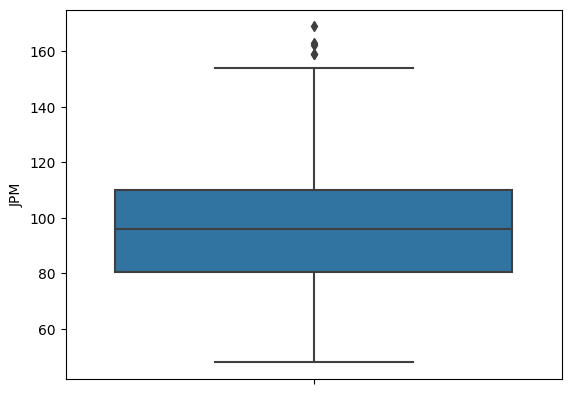

In [10]:
#volvemos a analizar el boxplot, ahora con la potencia genereada solo durante la presencia de luz solar
#sns.set_theme(style="ticks", palette="pastel")
#fig, ax = plt.subplots(figsize=(5,5)) #defino el tamaño del grafico
#sns.boxplot(y = 'GOOG', data = df)
#sns.boxplot(y = 'JPM', data = df)
BAC


In [10]:
url='https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv'
df= pd.read_csv(url,sep=',', header=None)
print(df.shape)
df = df.rename(columns = {0:'cero', 1:'unor', 2:'dos', 3:'tres', 
4:'cuatro',5:'cinco', 6:'seis',
7:'siete', 8:'ocho'})
df.replace(0, np.nan, inplace=True)

df.head()

(768, 9)


,cero,unor,dos,tres,cuatro,cinco,seis,siete,ocho
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,NaN
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,NaN
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0


In [33]:
# reemplazar con la mediana
from sklearn.impute import SimpleImputer
valores = df.values #numpy array con los valores
imputador = SimpleImputer(missing_values=np.nan, strategy='median') #definir el imputador
# transformar el dataset
transformados = imputador.fit_transform(valores)
transformados=pd.DataFrame(transformados)
#print(transformados.head().round(2))
#transformados
transformados

,0,1,2,3,4,5,6,7,8
0,6.0,148.0,72.0,35.0,125.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31.0,1.0
2,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,1.0
4,4.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,1.0
764,2.0,122.0,70.0,27.0,125.0,36.8,0.340,27.0,1.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,1.0
766,1.0,126.0,60.0,29.0,125.0,30.1,0.349,47.0,1.0


Bad pipe message: %s [b'\xe9\xc8\xca\xd0\xc0\x8cvW\xf7\xf2q\xd5d\x0e\xe0)\xaf$ \xda\xe9\x10\x19Mft\x07\x9f\xc8\x9f\x16S\xf7\xee\x93\xc8\xfcP7\xf4\xad\xb1\x8afx\xe2u\x11\xd4\xce\xa0\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08\n\x08\x0b\x08\x04\x08\x05\x08\x06\x04\x01\x05\x01\x06\x01']
Bad pipe message: %s [b'\xaa\x89\xad\xf0sm\xeb[\xbct*g\xa4rT\xcb\xad\xc3 ^\x9d\x86\xd4o\xa2\xd2\xb9\x87v\xa2\xb2\xaeI\xcf&\x836u']
Bad pipe message: %s [b'\xbd\x05\x8a\x17\xeb\xc7\x83\xb8\x05\xcb\xfe\xe3\xa3\xbcWe\x91']
Bad pipe message: %s [b';\xec\xed\x81\x88\x86_\n(\xf5\xf5']
Bad pipe message: %s [b'r\xdf-\x04\x18)\x7ft!\xe5#\xba\xfe\xbb\x13`\x18\x96\x00\x00>\xc0\x14\xc0\n\x009\x008\x007\x006\xc0\x0f\xc0\x05\x005\xc0\x13\xc0\t\x003\x002\x001\x0